<a href="https://colab.research.google.com/github/raka-raprast/heart-disease-prediction/blob/main/Raka%20Prasetyo%20-%20Heart%20Disease%20Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Heart Disease Prediction
By : Raka Ramadhani Aulia Prasetyo

Dataset: [Heart Disease UCI](https://www.kaggle.com/ronitf/heart-disease-uci)

##Preparation

###Import Data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from google.colab import files

In [2]:
!pip install -q kaggle

In [3]:
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"rakaraprasetyo","key":"168203d666b12e693dc4b5eff3380a06"}'}

In [4]:
! mkdir ~/.kaggle

In [5]:
! cp kaggle.json ~/.kaggle/

In [6]:
! chmod 600 ~/.kaggle/kaggle.json

In [7]:
!kaggle datasets download -d ronitf/heart-disease-uci

  0% 0.00/3.40k [00:00<?, ?B/s]
100% 3.40k/3.40k [00:00<00:00, 7.19MB/s]


In [8]:
!unzip heart-disease-uci.zip

Archive:  heart-disease-uci.zip
  inflating: heart.csv               


In [9]:
heart = pd.read_csv("heart.csv")

Understanding:
* Preparing and importing the data were using direct download to a kaggle site with my kaggle account API and the dataframe were assigned as heart.

###Data Manipulation

* age = patients age
* sex = patients gender
* cp = chest pain type (4 values)
* trestbps = resting blood pressure
* chol = serum cholestoral in mg/dl
* fbs = fasting blood sugar > 120 mg/dl
* restecg = resting electrocardiographic results (values 0,1,2)
* thalach = maximum heart rate achieved
* exang = exercise induced angina
* oldpeak = ST depression induced by exercise relative to rest
* slope = the slope of the peak exercise ST segment
* ca = number of major vessels (0-3) colored by flourosopy
* thal = 3 : normal; 6 : fixed defect; 7 : reversable defect
* target = sick or not

In [10]:
heart.head(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1
7,44,1,1,120,263,0,1,173,0,0.0,2,0,3,1
8,52,1,2,172,199,1,1,162,0,0.5,2,0,3,1
9,57,1,2,150,168,0,1,174,0,1.6,2,0,2,1


In [11]:
heart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [12]:
df_viz = heart.copy()

In [13]:
bins= [0,20,30,40,50, 60, 110]
labels = ['Less than Twenties','Twenties','Thirties','Forties','Fifties','More than Fifties']
df_viz['age_group'] = pd.cut(df_viz['age'], bins=bins, labels=labels, right=False)

In [14]:
df_viz.head(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,age_group
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1,More than Fifties
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1,Thirties
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1,Forties
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1,Fifties
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1,Fifties
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1,Fifties
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1,Fifties
7,44,1,1,120,263,0,1,173,0,0.0,2,0,3,1,Forties
8,52,1,2,172,199,1,1,162,0,0.5,2,0,3,1,Fifties
9,57,1,2,150,168,0,1,174,0,1.6,2,0,2,1,Fifties


Understanding:
* No more preprocessing needed as the data were pretty cleaned and the data already converted to be processed easily by model.

##Exploratory Data Analysis

###Categorical Variable

####age

In [15]:
import matplotlib.pyplot as plt

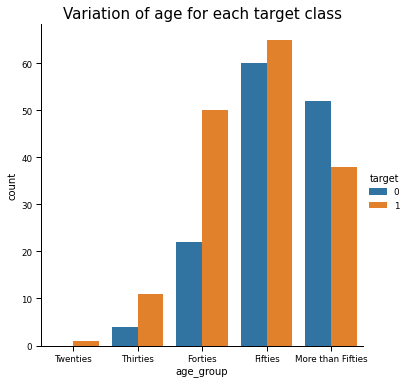

In [16]:
sns.set_context("paper", font_scale = 1, rc = {"font.size":10,"axes.titlesize": 15,"axes.labelsize": 10}) 
sns.catplot(kind = 'count', data = df_viz, x = 'age_group', hue = 'target', order = df_viz['age_group'].sort_values().unique())
plt.title('Variation of age for each target class')
plt.show()

Understanding:
* Fifties group has a higher target both 1 and 0.
* Twenties group has a lower target both 1 and 0.

####sex

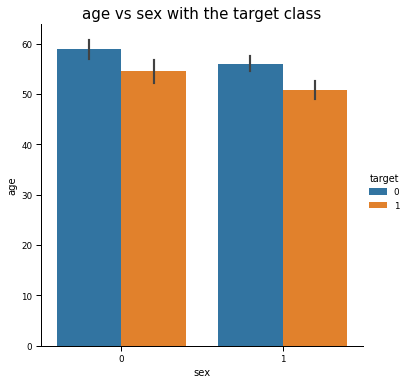

In [17]:
sns.catplot(kind = 'bar', data = df_viz, y = 'age', x = 'sex', hue = 'target')
plt.title('age vs sex with the target class')
plt.show()

Understanding:
* There is only slight different between two sex type to target.

####cp

Text(0.5, 1.0, 'age vs cp with the target class')

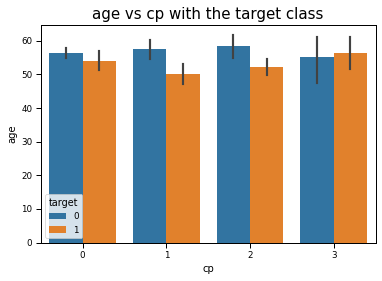

In [18]:
sns.barplot(data=heart,y='age',x ='cp',hue = 'target')
plt.title('age vs cp with the target class')

Understanding:
* chest pain type 4 has a higher value on target 1 than the other.
* chest pain type 3 has a higher value on target 0 than the other.

####trestbps

Text(0.5, 1.0, 'trestbps with target class')

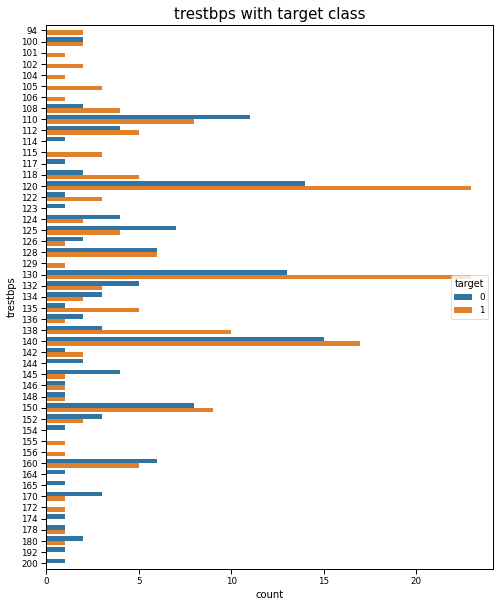

In [19]:
plt.figure(figsize=(8,10))
sns.countplot(data=heart,y ='trestbps',hue = 'target')
plt.title('trestbps with target class')

Understanding:
* trestbps value of 130 and 120 has similar count on target 1.

####chol

Text(0.5, 1.0, 'chol vs age with target class')

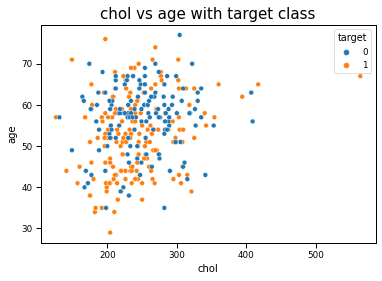

In [20]:
sns.scatterplot(data=heart, x="chol", y="age",hue='target')
plt.title('chol vs age with target class')

Understanding:
* Both chol from target 1 and 2 are scattered around value of 200 to 300.

####fbs

Text(0.5, 1.0, 'fbs with target class')

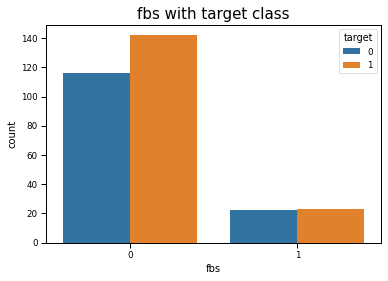

In [21]:
sns.countplot(data=heart,x ='fbs',hue = 'target')
plt.title('fbs with target class')

Understanding:
* Fasting blood sugar value of 0 are far count both 0 and 1 in target than the value of 1.

####restecg

Text(0.5, 1.0, 'restecg with target class')

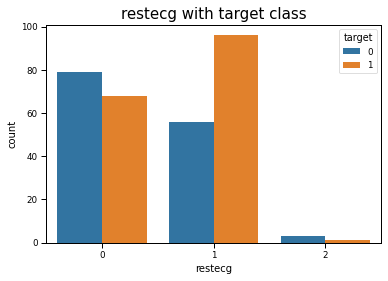

In [22]:
sns.countplot(data=heart,x ='restecg',hue = 'target')
plt.title('restecg with target class')

Understanding:
* restecg value of 2 are the lowest than the rest.

####thalach

Text(0.5, 1.0, 'thalach vs age with target class')

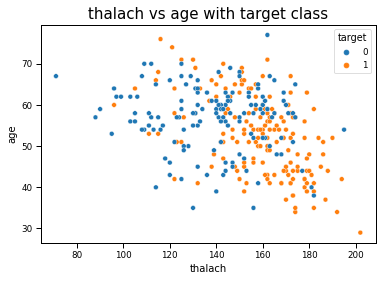

In [23]:
sns.scatterplot(data=heart,x ='thalach',y='age',hue = 'target')
plt.title('thalach vs age with target class')

Understanding:
* thalach value scattered around 100 to 190 from age 40 to 70.

####exang

Text(0.5, 1.0, 'exang with target class')

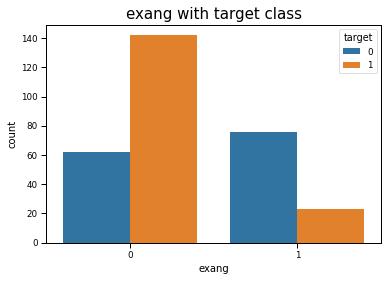

In [24]:
sns.countplot(data=heart,x ='exang',hue = 'target')
plt.title('exang with target class')

Understanding:
* exang value of 0 has higher value in target 1 than exang value of 1.

####oldpeak

Text(0.5, 1.0, 'oldpeak vs age with target class')

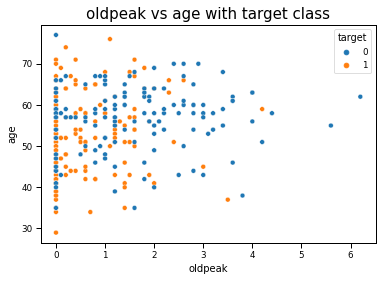

In [25]:
sns.scatterplot(data=heart,x ='oldpeak',y='age',hue = 'target')
plt.title('oldpeak vs age with target class')

Understanding:
* oldpeak value are gathered around 0 to 4 and around age 32 to 70

####slope

Text(0.5, 1.0, 'slope with target class')

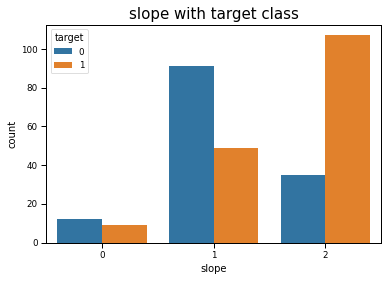

In [26]:
sns.countplot(data=heart,x ='slope',hue = 'target')
plt.title('slope with target class')

Understanding:
* slope value of 2 are higher than the rest in target of 1.
* slope value of 1 are higher than the rest in target of 2.

####ca

Text(0.5, 1.0, 'ca with target class')

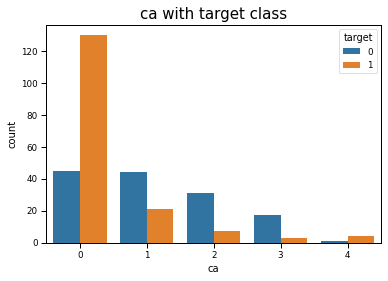

In [27]:
sns.countplot(data=heart,x ='ca',hue = 'target')
plt.title('ca with target class')

Understanding:
* ca value of 0 are higher than the rest in target of 1 and similar with ca value of 1 in target of 0.

####thal

Text(0.5, 1.0, 'thal with target class')

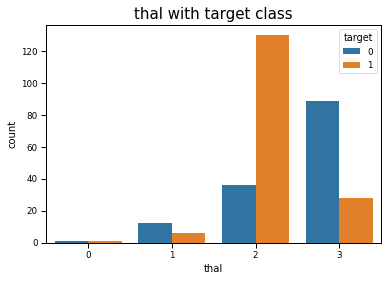

In [28]:
sns.countplot(data=heart,x ='thal',hue = 'target')
plt.title('thal with target class')

Understanding:
* thal value of 2 has a higher in target of 1 while thal value of 3 are higher in target of 0.

####target

Class 0: 138
Class 1: 165
Proportion: 0.84 : 1


Text(0.5, 1.0, 'Count (target)')

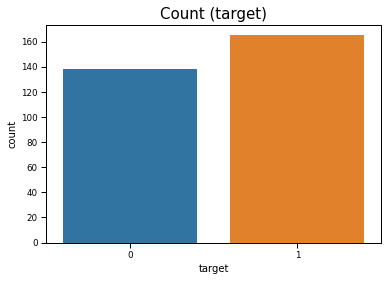

In [29]:
target_count = heart.target.value_counts()
print('Class 0:', target_count[0])
print('Class 1:', target_count[1])
print('Proportion:', round(target_count[0] / target_count[1], 2), ': 1')
sns.countplot(data=heart,x='target')
plt.title('Count (target)')

Understanding:
* the target data are slightly imbalance but still acceptable so the sampling isn't needed.

###Feature Correlation

In [30]:
numeric_column = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target']

In [31]:
heart[numeric_column].describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [32]:
numeric_column_filtered = ['age', 'sex', 'cp', 'trestbps', 'chol', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target']

In [33]:
heart[heart.isnull().any(axis=1)]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target


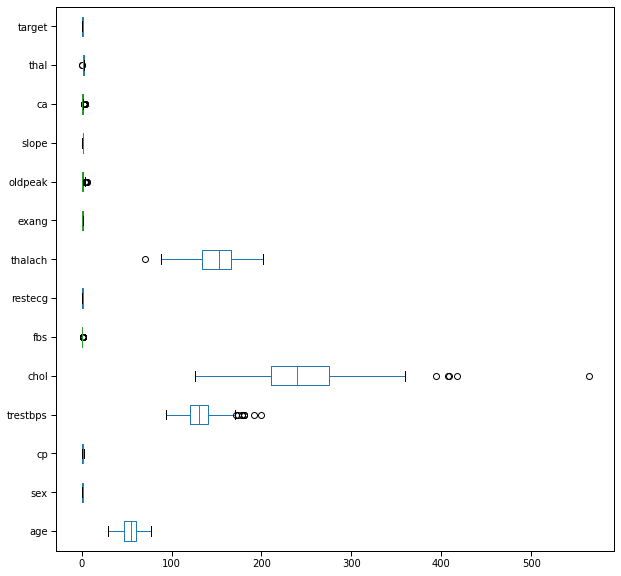

In [34]:
heart.boxplot(column=numeric_column,fontsize=10,rot=0,grid=False,figsize=(10,10),vert=False)

In [35]:
Q1 = heart[numeric_column].quantile(0.25)
Q3 = heart[numeric_column].quantile(0.75)
IQR = Q3 - Q1
boxplot_min = Q1 - 1.5 * IQR
boxplot_max = Q3 + 1.5 * IQR
print('Q1:\n',Q1)
print('\nQ3:\n',Q3)
print('\nIQR:\n',IQR)
print('\nMin:\n',boxplot_min)
print('\nMax:\n',boxplot_max)

Q1:
 age          47.5
sex           0.0
cp            0.0
trestbps    120.0
chol        211.0
fbs           0.0
restecg       0.0
thalach     133.5
exang         0.0
oldpeak       0.0
slope         1.0
ca            0.0
thal          2.0
target        0.0
Name: 0.25, dtype: float64

Q3:
 age          61.0
sex           1.0
cp            2.0
trestbps    140.0
chol        274.5
fbs           0.0
restecg       1.0
thalach     166.0
exang         1.0
oldpeak       1.6
slope         2.0
ca            1.0
thal          3.0
target        1.0
Name: 0.75, dtype: float64

IQR:
 age         13.5
sex          1.0
cp           2.0
trestbps    20.0
chol        63.5
fbs          0.0
restecg      1.0
thalach     32.5
exang        1.0
oldpeak      1.6
slope        1.0
ca           1.0
thal         1.0
target       1.0
dtype: float64

Min:
 age          27.25
sex          -1.50
cp           -3.00
trestbps     90.00
chol        115.75
fbs           0.00
restecg      -1.50
thalach      84.75
exang       

In [36]:
non_outlier_df = heart.copy()
for x in numeric_column:
  filter_min = non_outlier_df[x]<boxplot_min[x]
  filter_max = non_outlier_df[x]>boxplot_max[x]
  non_outlier_df = non_outlier_df[~(
    filter_min|filter_max
    )]

In [37]:
non_outlier_df.head(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1
7,44,1,1,120,263,0,1,173,0,0.0,2,0,3,1
9,57,1,2,150,168,0,1,174,0,1.6,2,0,2,1
10,54,1,0,140,239,0,1,160,0,1.2,2,0,2,1
11,48,0,2,130,275,0,1,139,0,0.2,2,0,2,1


In [38]:
non_outlier_df.shape

(228, 14)

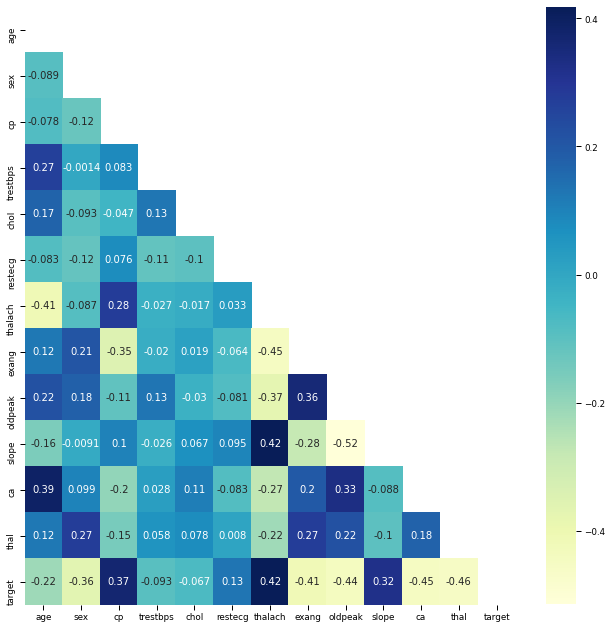

In [39]:
correlation_between_column = non_outlier_df[numeric_column_filtered].corr()
upper_triangle_corr = np.triu(correlation_between_column)

fig, ax = plt.subplots(figsize=(11,11))
sns.heatmap(correlation_between_column, annot = True, cmap="YlGnBu",ax=ax,annot_kws={"size":10},mask=upper_triangle_corr)

Understanding:
* No redundant variable were found so it is safe to put all of the variable without removing any one of it.

##Prediction Modelling

In [40]:
final_column=['age', 'sex', 'cp', 'trestbps', 'chol', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target']

In [41]:
final_df = heart[final_column]

###Choosing Model

In [42]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

In [43]:
X = final_df.iloc[:, :-1].values
y = final_df.iloc[:, -1].values

In [44]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

####Naive Bayes

In [45]:
from sklearn.naive_bayes import GaussianNB

In [46]:
nb = GaussianNB()
nbtrain = nb.fit(X_train, y_train)

In [47]:
nb_y_pred = nb.predict(X_test)

In [48]:
nb_cm_test = confusion_matrix(nb_y_pred, y_test)
nb_y_pred_train = nb.predict(X_train)
nb_cm_train = confusion_matrix(nb_y_pred_train, y_train)

####Decision Tree

In [49]:
from sklearn.tree import DecisionTreeClassifier

In [50]:
dt = DecisionTreeClassifier()
dttrain = dt.fit(X_train, y_train)

In [51]:
dt_y_pred = dt.predict(X_test)

In [52]:
dt_cm_test = confusion_matrix(dt_y_pred, y_test)
dt_y_pred_train = dt.predict(X_train)
dt_cm_train = confusion_matrix(dt_y_pred_train, y_train)

####Random Forest

In [53]:
from sklearn.ensemble import RandomForestClassifier

In [54]:
rf = RandomForestClassifier(n_estimators = 10)
rftrain = rf.fit(X_train, y_train)

In [55]:
rf_y_pred = rf.predict(X_test)

In [56]:
rf_cm_test = confusion_matrix(rf_y_pred, y_test)
rf_y_pred_train = rf.predict(X_train)
rf_cm_train = confusion_matrix(rf_y_pred_train, y_train)

In [57]:
print()
print('Accuracy for training set for Naive Bayes = {}'.format((nb_cm_train[0][0] + nb_cm_train[1][1])/len(y_train)))
print('Accuracy for test set for Naive Bayes = {}'.format((nb_cm_test[0][0] + nb_cm_test[1][1])/len(y_test)))
print()
print('Accuracy for training set for Decision Tree = {}'.format((dt_cm_train[0][0] + dt_cm_train[1][1])/len(y_train)))
print('Accuracy for test set for Decision Tree = {}'.format((dt_cm_test[0][0] + dt_cm_test[1][1])/len(y_test)))
print()
print('Accuracy for training set for Random Forest = {}'.format((rf_cm_train[0][0] + rf_cm_train[1][1])/len(y_train)))
print('Accuracy for test set for Random Forest = {}'.format((rf_cm_test[0][0] + rf_cm_test[1][1])/len(y_test)))


Accuracy for training set for Naive Bayes = 0.8490566037735849
Accuracy for test set for Naive Bayes = 0.8131868131868132

Accuracy for training set for Decision Tree = 1.0
Accuracy for test set for Decision Tree = 0.7252747252747253

Accuracy for training set for Random Forest = 0.9858490566037735
Accuracy for test set for Random Forest = 0.7582417582417582


Understanding:
* both Decision Tree and Random Forest has higher training set accuracy than Naive Bayes but the Test accuracy of Naive Bayes are higher than two other models that's why Gaussian Naive Bayes model were selected.

##Evaluation

###Confusion Matrix

####F1 Score

In [58]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

In [59]:
y_pred = nbtrain.predict(X_test)

In [60]:
labels = y_test
predictions = y_pred

In [61]:
TP = 0
for i in range(0,len(labels)):
    if labels[i] == predictions[i] and labels[i] == 1:
       TP+=1
print("True Positive: ", TP) # 3

True Positive:  41


In [62]:
FP = 0
for i in range(0,len(labels)):
    if labels[i] == 0 and predictions[i] == 1:
       FP+=1
print("False Positive: ", FP) # 3

False Positive:  11


In [63]:
TN = 0
for i in range(0,len(labels)):
    if labels[i] == predictions[i] and labels[i] == 0:
       TN+=1
print("True Negative: ", TN) # 0

True Negative:  33


In [64]:
FN = 0
for i in range(0,len(labels)):
    if labels[i] == 1 and predictions[i] == 0:
       FN+=1
print("False Negative: ", FN) # 4

False Negative:  6


In [65]:
CP = 0
for i in range(0,len(labels)):
    if labels[i] == predictions[i]:
       CP+=1
print("Correct Prediction: ", CP) # 3
print(CP == TP + TN) # True

Correct Prediction:  74
True


In [66]:
ICP = 0
for i in range(0,len(labels)):
    if labels[i] != predictions[i]:
       ICP+=1
print("Incorrect Prediction: ", ICP)# 7
print(ICP == FP + FN) # True

Incorrect Prediction:  17
True


In [67]:
recall = (TP)/(TP+FN)
print('Recall Score:',recall*100)

Recall Score: 87.2340425531915


In [68]:
precision = TP/(TP+FP)
print('Precision Score:',precision*100,'%')

Precision Score: 78.84615384615384 %


In [69]:
AM = (1 + 0.2)/2
HM = 2*(1*0.2)/(1+0.2)
print('Arithmetic Mean:',AM*100,'%')# 0.6
print('Harmonic Mean:',HM*100,'%')# 0.333

Arithmetic Mean: 60.0 %
Harmonic Mean: 33.333333333333336 %


In [70]:
f1 = 2*(precision * recall)/(precision + recall)
print('F1 Score:',f1*100,'%')

F1 Score: 82.82828282828282 %


In [71]:
confusion = confusion_matrix(labels, predictions)
FN = confusion[1][0]
TN = confusion[0][0]
TP = confusion[1][1]
FP = confusion[0][1]

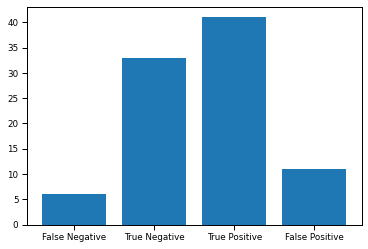

In [72]:
plt.bar(['False Negative' , 'True Negative' , 'True Positive' , 'False Positive'],[FN,TN,TP,FP])
plt.show()

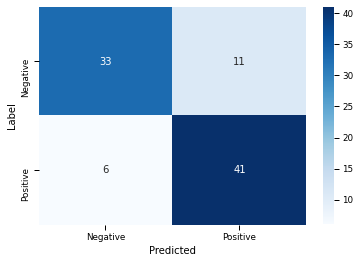

In [73]:
sns.heatmap(confusion , annot=True , xticklabels=['Negative' , 'Positive'] , yticklabels=['Negative' , 'Positive'], cmap='Blues', fmt='g')
plt.ylabel("Label")
plt.xlabel("Predicted")
plt.show()

Understanding:
* F1 Score are calculated by both precision and recall which makes it as overall score and as we can see there is only slight different between both Target 1 and 0 score as well as there is similar accuracy with the Naive Bayes model.

####Area Under Curve

In [74]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import cross_val_score

In [75]:
y_score = nb.fit(X_train, y_train).predict_proba(X_test)

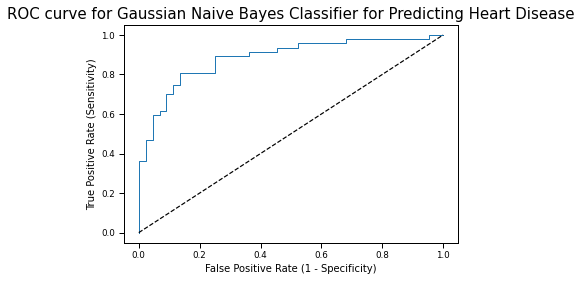

In [76]:
fpr, tpr, thresholds = roc_curve(y_test, y_score[:,1])
plt.figure(figsize=(6,4))
plt.plot(fpr, tpr, linewidth=1)
plt.plot([0,1], [0,1], 'k--' )
plt.rcParams['font.size'] = 12
plt.title('ROC curve for Gaussian Naive Bayes Classifier for Predicting Heart Disease')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.show()

In [77]:
ROC_AUC = roc_auc_score(y_test, nb_y_pred)
print('ROC AUC : {:.4f}'.format(ROC_AUC))

ROC AUC : 0.8112


In [78]:
Cross_validated_ROC_AUC = cross_val_score(nb, X_train, y_train, cv=5, scoring='roc_auc').mean()
print('Cross validated ROC AUC : {:.4f}'.format(Cross_validated_ROC_AUC))

Cross validated ROC AUC : 0.8955


Understanding:
* The ROC AUC Score were similar to the accuracy of Gaussian Naive Bayes

####K-Fold Cross Validation

In [79]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(nb, X_train, y_train, cv = 10, scoring='accuracy')

print('Cross-validation scores:{}'.format(scores))

Cross-validation scores:[0.77272727 0.77272727 0.80952381 0.9047619  0.9047619  0.76190476
 0.95238095 0.76190476 0.76190476 0.85714286]


In [80]:
print('Average cross-validation score: {:.4f}'.format(scores.mean()))

Average cross-validation score: 0.8260


Understanding:
* The K-Fold Score were similar to the accuracy of Gaussian Naive Bayes

##Conclusion
* Machine Learning can be use for predicting heart disease.
* Gaussian Naive Bayes are the most effective model in this analysis compared to Random Forrest and Decision Tree.
* F1 Score used for Confusion Matrix.
* Random Forest and Decision Tree models also give the accuracy above 70%.
* Target data were slightly imbalance but still at acceptable rate.